# Exercise Set 5: Jacob Cardinal Tremblay, Charchit Kumar Sethi, and Sachin Pradeep Etakkepravan Thulicheri

Due: **9:30 9 May 2022**

Discussion: **13:00 13 May 2022**

**Online submission** at via [ILIAS](https://www.ilias.uni-koeln.de/ilias/goto_uk_exc_4593683.html) in the directory Exercises / Übungen -> Submission of Exercises / Rückgabe des Übungsblätter

In [1]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
import scipy
import scipy.stats as st

# 1. Parametric tests: mean [100 points]

A very common question arises when we have two sets of data (or one set of data and a model) and we ask if they differ in location. To contrast the classical and Bayesian methods for hypothesis testing, we look at the simple case of comparison of means. We deal with a Gaussian distribution, because its analytical tractability has resulted in many tests being developed for Gaussian data; and then, of course, there is the central limit theorem.

Let us suppose we have $n$ data $X_i$ drawn from a Gaussian of mean $\mu_x$, and $m$ other data $Y_i$, drawn from a Gaussian of **identical variance** but different mean $\mu_y$. Call the common variance $\sigma^2$. The Bayesian method is to calculate the joint posterior distribution:

$$ \mathcal{P}(\mu_x,\mu_y,\sigma)\propto\dfrac{1}{\sigma^{n+m+1}}\exp\left(-\dfrac{\Sigma_i (x_i-\mu_x)^2}{2\sigma^2}\right)\exp\left(-\dfrac{\Sigma_i (y_i-\mu_y)^2}{2\sigma^2}\right) $$

in which we have used the Jeffreys prior for the variance. Integrating over the 'nuisance' parameter $\sigma$, we would get the joint probability prob($\mu_x,\mu_y$) and could use it to derive, for example, the probability that $\mu_x$ is bigger than $\mu_y$. From this we can calculate the probability distribution of ($\mu_x-\mu_y$). The result depends on the data via a quantity

$$ t^\prime = \dfrac{(\mu_x-\mu_y)-(\bar{X}-\bar{Y})}{s\sqrt{\frac{1}{m}+\frac{1}{n}}}, \qquad \textrm{where} \qquad s^2 = \dfrac{nS_x+mS_y}{\nu} $$

with the usual mean squares $S_x = \Sigma (X_i-\bar{X})^2 / n$, similarly for $S_y$, and $\nu=n+m-2$. $s$ is called pooled standard deviation. The probability for $t^\prime$ is

$$ \mathcal{P}(t^\prime) = \dfrac{\Gamma\left(\frac{\nu+1}{2}\right)}{\sqrt{\pi\nu}\Gamma\left(\frac{\nu}{2}\right)} \left(1+\dfrac{t^{\prime 2}}{\nu}\right)^{-\frac{1}{2}(\nu+1)} $$

We regard the data as fixed and $(\mu_x-\mu_y)$ as the variable, simply computing the probability of any particular difference in the means. We might alternatively work out the range of differences whichare, say, 90 percent probable, or we might carry the distribution of $(\mu_x-\mu_y)$ on into a later probabilistic calculation. If we instead follow the classical line of reasoning, we do not treat the $\mu$'s as random variables. Instead we guess that the difference in the averages $X-Y$ will be the statistic we need; and we calculate its distribution on the null hypothesis that $\mu_x=\mu_y$. We find that

$$ t=\dfrac{\bar{X}-\bar{Y}}{s\sqrt{\frac{1}{m}+\frac{1}{n}}} $$

follows a t-distribution with $(n+m-2)$ degrees of freedom. This is the classical Student's t. This gives the basis of a classical hypothesis test, the t-test for means. Assuming that $(\mu_x-\mu_y)=0$ (the null hypothesis), we calculate t. If it (or some greater value) is very unlikely, we think that the null hypothesis is ruled out.

**a.** Suppose we have two small sets of data, from Gaussian distributions of equal variance: 

$$
(-1.22, -1.17, 0.93, -0.58, -1.14) \in A,
$$

and,

$$
(1.03, -1.59, -0.41, 0.71, 2.10) \in B.
$$ 

Compute the respective mean values and the pooled standard deviation $s$ **10 Points**

In [2]:
#Define both datasets as arrays
arrA = np.array([-1.22,-1.17,0.93,-0.58,-1.14])
arrB = np.array([1.03,-1.59,-0.41,0.71,2.10])
#Calculate the mean
meanA = np.mean(arrA)
meanB = np.mean(arrB)
#Print the means
print("The respective mean of A is: " + str(meanA) + ", and for B is: " + str(meanB)+ ".")
nu = len(arrA)+len(arrB)-2
#Calculate the standard deviations
n1 = len(arrA)
n2 = len(arrB)
stdA = np.std(arrA)
stdB = np.std(arrB)
print('std of A =',stdA,'std of A =',stdB)
s=np.sqrt((stdA*len(arrA)+stdB*len(arrB))/nu)
# stdPool = np.sqrt(((n1-1)*(stdA**2)+(n2-1)*stdB**2)/(n1+n2))
#Print the pooled standard deviation
print("The pooled standard deviation is: s = " + str(s))


The respective mean of A is: -0.6359999999999999, and for B is: 0.368.
std of A = 0.8167888343996874 std of A = 1.264442960358434
The pooled standard deviation is: s = 1.1405129862144603


Where the pooled standard deviation as: 
${s} = \sqrt{\left( \frac{n S_{x} +m S_{y}}{\nu} \right )}=1.141$

**b.** Compute the t statistic. Perform a two tailed test. What is the chance that these data would arise if the means were the same. What is the chance if we did a one-tailed test? **25 Points**

Two tailed test:

- Null Hypothesis $H_0$: $\mu_x-\mu_y = 0$

- Alternative Hypothesis $H_a$: $\mu_x-\mu_y \neq 0$

One tailed test:

- Null Hypothesis $H_0$: $\mu_x-\mu_y = 0$

- Alternative Hypothesis $H_a$: $\mu_x-\mu_y \le 0$

In [3]:
t_val = ((meanA-meanB)/(s*np.sqrt(1/len(arrA)+1/len(arrB))))
print('t_value=',t_val)
p = t.cdf(t_val,nu)
print('p_value=',p,'two tailed p_value=',p*2)
# plt.fill_between(x=np.arange(-6,t_val,0.01), y1 = t.pdf(np.arange(-6,t_val,0.01),nu),facecolor ='g',alpha =0.35)
# plt.plot(np.arange(-6,6,0.01), t.pdf(np.arange(-6,6,0.01),nu))
# plt.fill_between(x=np.arange(-t_val,6,0.01), y1 = t.pdf(np.arange(-t_val,6,0.01),nu),facecolor ='g',alpha =0.35)
# plt.text(x=-2.5, y=0.03, s= 'p='+str(round(p,3)))
# plt.text(x=1.5, y=0.03, s= 'p='+str(round(p,3)))
# plt.title(r't distribution with $\mu =0,dof = 8$')
# plt.xlabel('t')
# plt.ylabel(r'prob')

t_value= -1.391885409979911
p_value= 0.10071622535977318 two tailed p_value= 0.20143245071954635


* One tailed p_value is 0.1007, two tailed p_value is 0.2014. 

* The probability that these data would arise if the means were the same is 0.2014

* The probability for one-tailed test is 0.1007

**c.** Calculate the distribution of $(\mu_x-\mu_y)$ from a Bayesian point of view and plot the resulting prob($\mu_x-\mu_y$) as a function of $(\mu_x-\mu_y)$. What is the chance that $\mu_x$ is not smaller than $\mu_y$? **25 Points**

#### *we need to use this formula for this problem*
$$ \mathcal{P}(t^\prime) = \dfrac{\Gamma\left(\frac{\nu+1}{2}\right)}{\sqrt{\pi\nu}\Gamma\left(\frac{\nu}{2}\right)} \left(1+\dfrac{t^{\prime 2}}{\nu}\right)^{-\frac{1}{2}(\nu+1)} $$
* where t' is given by the following;
$$ t^\prime = \dfrac{(\mu_x-\mu_y)-(\bar{X}-\bar{Y})}{s\sqrt{\frac{1}{m}+\frac{1}{n}}}$$
* and we already see that s is define by;
 $$\qquad s^2 = \dfrac{nS_x+mS_y}{\nu} $$
*by combining above these two eqns we found the distribution of $(\mu_x-\mu_y)$ is;*
$$ \mathcal{P}(\mu_x-\mu_y) = \dfrac{\Gamma\left(\frac{\nu+1}{2}\right)}{\sqrt{\pi\nu}\Gamma\left(\frac{\nu}{2}\right)} \left(1+\dfrac{({\dfrac{(\mu_x-\mu_y)-(\bar{X}-\bar{Y})}{s\sqrt{\frac{1}{m}+\frac{1}{n}}}})^2}{\nu}\right)^{-\frac{1}{2}(\nu+1)} $$ 

The probability mu_x not smaller than mu_y is  0.1007162253597732


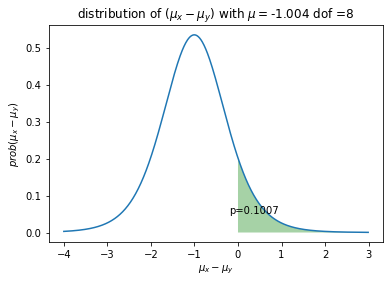

In [4]:
plt.plot(np.arange(-4,3,0.01), t.pdf(np.arange(-4,3,0.01),nu,loc=meanA-meanB,scale = s*np.sqrt(1/len(arrA)+1/len(arrB))))
plt.fill_between(x=np.arange(0,3,0.01), y1 = t.pdf(np.arange(0,3,0.01),nu,loc=meanA-meanB,scale = s*np.sqrt(1/len(arrA)+1/len(arrB))),facecolor ='g',alpha =0.35)
p_red = 1-t.cdf(0,nu,loc=meanA-meanB,scale = s*np.sqrt(1/len(arrA)+1/len(arrB)))
plt.title('distribution of $(\mu_x-\mu_y)$ with $\mu =$'+str(meanA-meanB)+' dof ='+str(nu))
plt.xlabel('$\mu_x-\mu_y$')
plt.ylabel(r'$prob(\mu_x-\mu_y)$')
plt.text(x=-0.2,y=0.05,s='p='+str(round(p_red,4)))
print('The probability mu_x not smaller than mu_y is ',p_red)

**d.** By analogous calculations we arrive at the F test for variances. Again Gaussian distributions are assumed. The null hypothesis is $\sigma_x=\sigma_y$, the data are $X_i (i=1,\ldots,n)$ and $Y_i (i=1,\ldots,m)$ and the test statistic is,

$${\cal F} = \dfrac{\Sigma_i\left(X_i-\bar{X}\right)^2/(n-1)}{\Sigma_i\left(Y_i-\bar{Y}\right)^2/(m-1)}$$

This follows the F ratio distribution with $(n-1)$ and $(m-1)$ degrees of freedom. The testing is the as for the Student's t. Perform a test whether the variances of the two data sets are the same. **40 Points**

In [9]:
n = len(arrA)
m = len(arrB)
sigxarr = np.array([])
sigyarr = np.array([])

for i in range(0,5):
    sigx = ((arrA[i]-meanA)**2 /(n-1))
    sigy = ((arrB[i]-meanB)**2 /(m-1))
    sigxarr = np.append(sigxarr, sigx)
    sigyarr = np.append(sigyarr, sigy)
    
F_stat = np.sum(sigxarr)/np.sum(sigyarr)

df1 = len(arrA) - 1
df2 = len(arrB) - 1


#Testing is the same as for the Student's t. So we apply the same methodology
#Two-tailed:
p_value2 = 2.0*(1.0 - st.f.cdf(F_stat, df1, df2))
print("The two-tailed p_value is: " + str(p_value2))
print("The probability that these data would arise if the means were the same is: " + str(p_value2))

#One-Tailed:
p_value3 = 1.0 - st.f.cdf(F_stat, df1, df2)
print("The one-tailed p_value is: " + str(p_value3))
print("The probability that these data would arise if the means were the same (using a one-tailed test) is: " + str(p_value3))


The two-tailed p_value is: 1.5819861151883725
The probability that these data would arise if the means were the same is: 1.5819861151883725
The one-tailed p_value is: 0.7909930575941863
The probability that these data would arise if the means were the same (using a one-tailed test) is: 0.7909930575941863


Levene’s test can be used to check if the variances of two data sets are equal. 

In [11]:
from scipy.stats import levene
#Check if variances are the same
stat, p = levene(arrA, arrB)
print("Stat: " + str(stat) + ", p: " + str(p))

Stat: 0.7118103367706169, p: 0.42335154061767


A small p suggests that the populations do not have equal variance. Here we have a relatively high value of p, which means that our populations have equal variance. Typically, if p is larger than 0.05, we accept the null hypothesis.